# Python Bootcamp Project 24-25: Customer Segmentation

In [25]:
# allows for multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

1. Revenue Contribution Analysis: Identifying products or categories
contributing the most to overall revenue.
2. Product Segmentation: Grouping products based on sales volume,
revenue, and daily sales trends.
3. Customer Purchase Patterns: Segmenting customers based on or-
der frequency and total spending.
4. Daily Sales Trends: Analyzing daily sales data to identify peak pe-
riods and consistent performers.
3
5. Order Behavior Analysis: Examining the distribution and frequency
of total orders per product.
6. Marketing Campaign Effectiveness: Using cluster insights to rec-
ommend promotional strategies for different segments

## Data Import

In [28]:
df = pd.read_excel('Online Retail.xlsx')
print('******************************************** COLUMNS OF DATASET *****************************************************')
df.columns
print('******************************************** PREVIEW OF FIRST 5 COLUMNS ********************************************')
df.head()
print('******************************************** PREVIEW OF LAST 5 COLUMNS ********************************************')
df.tail()
print('******************************************* NUMBER OF ROWS AND DATA TYPES ******************************************')
df.info()
print('************************************************ DESCRIPTION OF DATA  **********************************************')
df.describe()


******************************************** COLUMNS OF DATASET *****************************************************


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

******************************************** PREVIEW OF FIRST 5 COLUMNS ********************************************


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


******************************************** PREVIEW OF LAST 5 COLUMNS ********************************************


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


******************************************* NUMBER OF ROWS AND DATA TYPES ******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
************************************************ DESCRIPTION OF DATA  **********************************************


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [36]:
num_rows = len(df)
num_cols = len(df.columns)
print(f'Number of rows are {num_rows}, and number of columns are {num_cols}.')
column_names = df.columns.tolist()
column_names

Number of rows are 541909, and number of columns are 8.


['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

## Data Cleaning

In [29]:
df.duplicated(df, keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

No Duplicate data in the Dataset

In [37]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
# # Fill missing values in 'category', 'group', and 'subcategory' columns
# df['category'].fillna(df['category'].mode()[0], inplace=True)
# df['group'].fillna(df['group'].mode()[0], inplace=True)
# df['subcategory'].fillna(df['subcategory'].mode()[0], inplace=True)
df.fillna(df, inplace=True)

In [21]:
df.dropna(how = 'all')

,sku,category,name,quantity_sold,revenue,unique_orders,group,subcategory,total_orders,total_revenue,days,daily_sales
0,pot_1kg,Vegetables,Potatoes 1Kg,790,39570.0,298,Fruits and Vegetables,Vegetables,3702,3909982,8,98.750
1,oni_1kg,Vegetables,Onions 1kg,575,20125.0,217,Fruits and Vegetables,Vegetables,3702,3909982,8,71.875
2,olp_mil_1p5,Milk & Tea Whiteners,Olpers Milk 1.5L,439,95263.0,164,Dairy & Eggs,Milk,3702,3909982,8,54.875
3,che_red_fla_hot_31g,Crisps & Snacks,Cheetos Red Flamin Hot 30gm,387,7740.0,119,"Snacks, Sweets & Chocolates",Crisps,3702,3909982,8,48.375
4,ban_1_doz,Fruits,Banana 1 Dozen,370,64535.0,322,Fruits and Vegetables,Fruits,3702,3909982,8,46.250
...,...,...,...,...,...,...,...,...,...,...,...,...
8201,kit_sen_duo_tas_del_coc_58g,Chocolates & Sweets,Kitkat Senses Duo Taste Deluxe Coconut 58gm,0,0.0,1,"Snacks, Sweets & Chocolates",Mints & Chewing Gum,6648,7274763,8,0.000
8202,pel_not_76_76,Office & Schools,Pelikan Notes 76mmx76mm,0,0.0,1,Stationery & Gifts,Notebooks & Memos,6648,7274763,8,0.000
8203,joh_bab_pow_for_dry_ski_100,Baby Skin & Hair Care,Johnson's Baby Powder For Dry Skin 100gm,0,0.0,1,Mother & Baby,Baby Moisturizers & Powders,6648,7274763,8,0.000
8204,coo_dre_cre_str_&_van_bis_tic_pac_24_pac,Biscuits & Wafers,Cookiania Dream Cream Strawberry & Vanilla Bis...,0,0.0,1,"Snacks, Sweets & Chocolates",Biscuits & Cookies,6648,7274763,8,0.000


In [22]:
# Normalizing relevant columns for clustering
scaler = MinMaxScaler()
columns_to_normalize = ['revenue', 'quantity_sold', 'total_orders', 'daily_sales']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

columns_to_normalize

['revenue', 'quantity_sold', 'total_orders', 'daily_sales']

In [23]:
### Step 2: Revenue Contribution Analysis
# Calculate revenue contribution by category and subcategory
category_revenue = df.groupby('category')['revenue'].sum()
subcategory_revenue = df.groupby(['category', 'subcategory'])['revenue'].sum()
category_revenue_percentage = (category_revenue / category_revenue.sum()) * 100
subcategory_revenue_percentage = (subcategory_revenue / category_revenue.sum()) * 100

print("Revenue Contribution by Category-------")
category_revenue_percentage

print("\nRevenue Contribution by Subcategory-------")
subcategory_revenue_percentage

Revenue Contribution by Category-------


category
*Ramadan Bundles*        0.618555
Accessories              0.125213
Art & Crafts             0.010142
Baby Skin & Hair Care    0.298552
Baby/Mother Food         2.189896
                           ...   
Sugarfree                0.018273
Tea & Coffee             1.981608
Vegetables               4.849200
Water                    0.240330
Yogurt                   2.137449
Name: revenue, Length: 65, dtype: float64


Revenue Contribution by Subcategory-------


category               subcategory                
*Ramadan Bundles*      Ramadan Bundle Packages        0.618555
Accessories            Litters & Scoops               0.125213
Art & Crafts           Coloring                       0.010142
Baby Skin & Hair Care  Baby Moisturizers & Powders    0.108434
                       Bath & Shampoo                 0.190118
                                                        ...   
Tea & Coffee           Tea                            1.687084
Vegetables             Vegetables                     4.849200
Water                  Mineral Water                  0.240330
Yogurt                 Milk                           0.146647
                       Yogurt                         1.990802
Name: revenue, Length: 145, dtype: float64

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Replace with actual data from Power BI
data = 'Airlift Data.xlsx'

# Create a contour plot
plt.figure(figsize=(10, 6))
sns.kdeplot(x=data['Longitude'], y=data['Latitude'], 
            cmap="coolwarm", fill=True)
plt.show()


<Figure size 1000x600 with 0 Axes>

TypeError: string indices must be integers, not 'str'

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='category'>

Text(0.5, 1.0, 'Revenue Contribution by Category')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Revenue Contribution (%)')

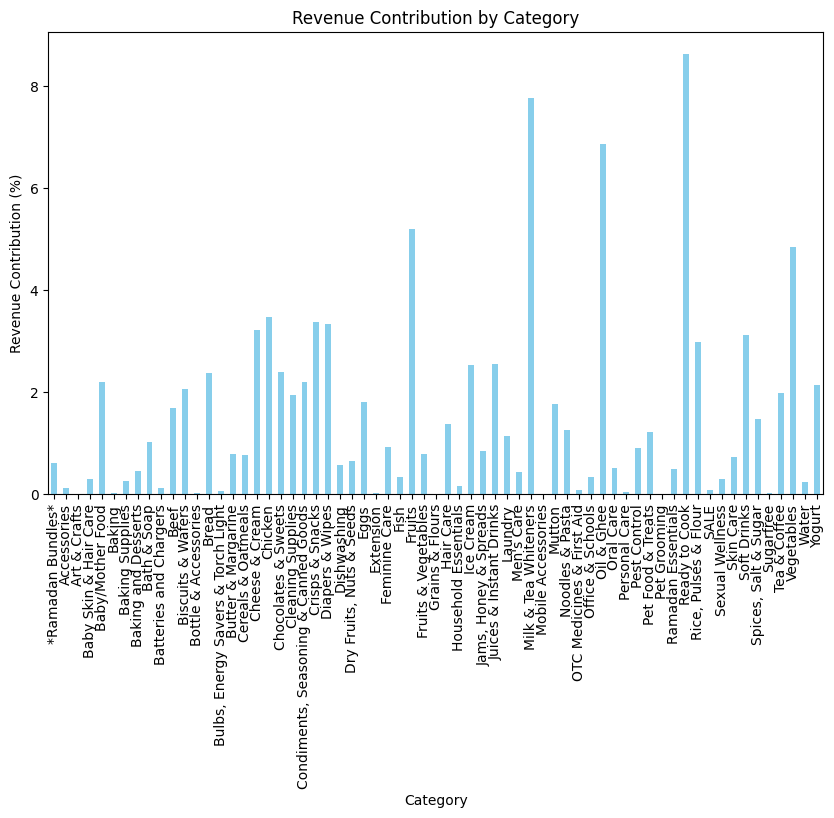

In [101]:
# Plot revenue contribution by category
plt.figure(figsize=(10, 6))
category_revenue_percentage.plot(kind='bar', color='skyblue')
plt.title('Revenue Contribution by Category')
plt.xlabel('Category')
plt.ylabel('Revenue Contribution (%)')
plt.show()

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data, filling any missing values with 0 if needed
subcategory_pivot = subcategory_revenue.unstack().fillna(0)

# Plot a simple heatmap for revenue contribution by subcategory
plt.figure(figsize=(20, 50))
sns.heatmap(
    subcategory_pivot, 
    cmap="YlGnBu",         # Color scheme for readability
    annot=True,            # Show values in each cell
    fmt=".1f",             # Format values with one decimal point
    linewidths=1,        # Add subtle grid lines
    linecolor="gray",      # Set grid line color
    cbar_kws={'label': 'Revenue Contribution (%)'}  # Label for the color bar
)

# Set title and axis labels for clarity
plt.title('Revenue Contribution by Subcategory', fontsize=16, fontweight='bold')
plt.xlabel('Subcategory', fontsize=14, fontweight='bold')
plt.ylabel('Category', fontsize=14, fontweight='bold')

# Display the heatmap
plt.show()


NameError: name 'subcategory_revenue' is not defined

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='subcategory', ylabel='category'>

Text(0.5, 1.0, 'Revenue Contribution by Subcategory')

Text(0.5, 58.7222222222222, 'Subcategory')

Text(120.7222222222222, 0.5, 'Category')

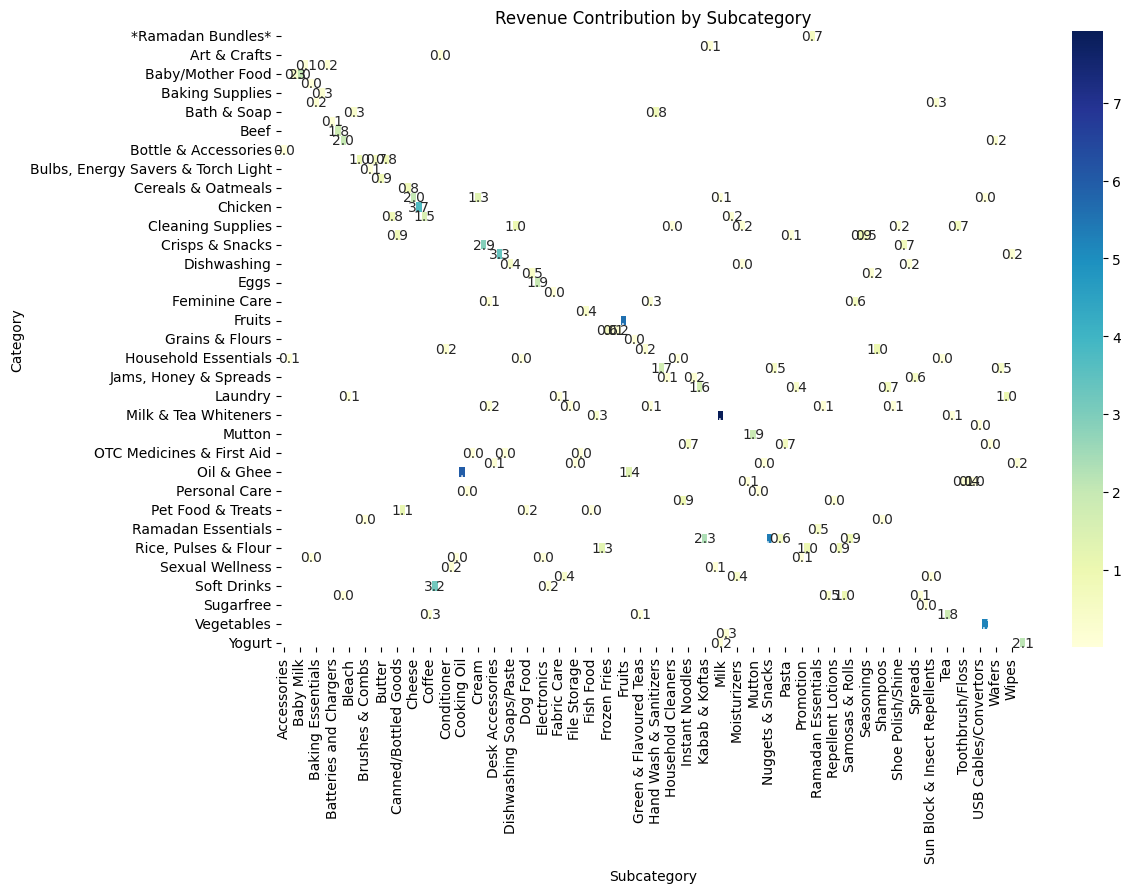

In [87]:
# Heatmap for revenue contribution by subcategory
subcategory_pivot = subcategory_revenue.unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(subcategory_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Revenue Contribution by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Category')
plt.show()

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='revenue', ylabel='Count'>

Text(0.5, 1.0, 'Revenue Distribution')

Text(0.5, 0, 'Revenue')

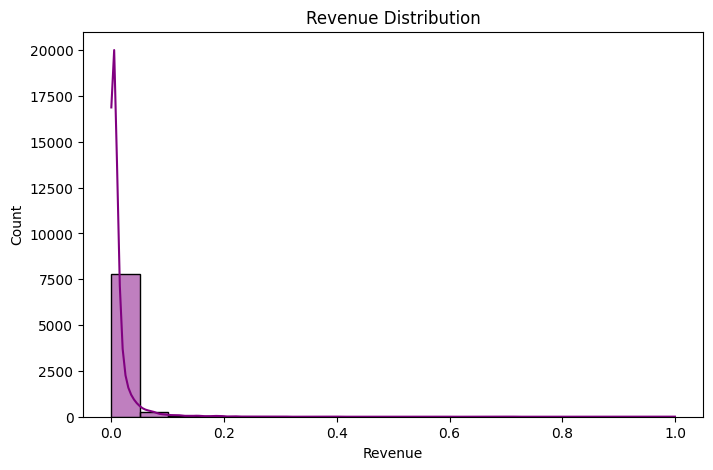

In [88]:
### Additional: Revenue and Quantity Sold Distribution
# Revenue Distribution Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['revenue'], bins=20, color='purple', kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.show()

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='quantity_sold', ylabel='Count'>

Text(0.5, 1.0, 'Quantity Sold Distribution')

Text(0.5, 0, 'Quantity Sold')

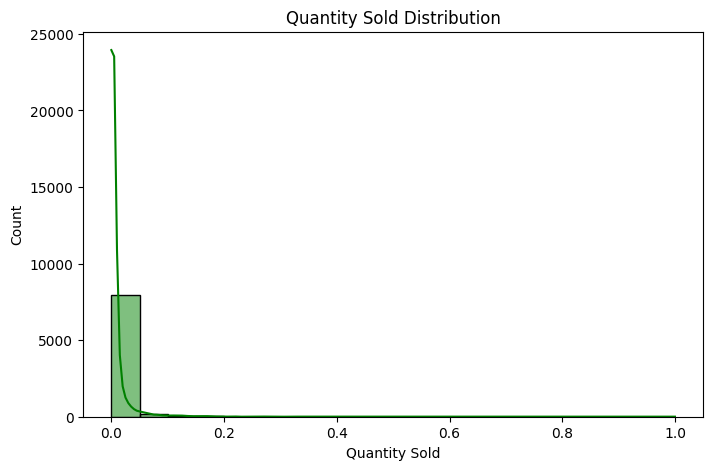

In [89]:
# Quantity Sold Distribution Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['quantity_sold'], bins=20, color='green', kde=True)
plt.title('Quantity Sold Distribution')
plt.xlabel('Quantity Sold')
plt.show()